# Intelligent Systems 
# Assignment 13 - KNN Machine Learning
## Arturo Fornés Arvayo A01227071
## March 31, 2019


In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
# splitter
from sklearn.model_selection import train_test_split
# scale data
from sklearn.preprocessing import StandardScaler
# algorithms
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics

# read data set
import csv
import pandas as pd
#     COMPUTING THE CONFUSION MATRIX
from sklearn.metrics import confusion_matrix

In [3]:
# Read data set
pima = pd.read_csv('0500_pima_indians_diabetes_data.csv', header=None)

In [4]:
# Explore the data set
pima.head()

,0,1,2,3,4,5,6,7,8
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [26]:
# Separating pima in X and y
X=pima[pima.columns[0:8]]
y=pima[pima.columns[8:9]]
# Transform "y" from data frame to list
# Making Class a list
y=y[y.columns[0:1]].values.tolist()

In [30]:
# Decrease the testing percentage from 40% down to 20%
# • Measure the Score in every case, construct a tabulate and plot it.
percentages = list(range(40, 19, -1))
percentages_results = []
for percentage in range(40, 19, -1):
    test_size = percentage / 100
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=42)
    knn_percentages = KNeighborsClassifier(10)
    knn_percentages.fit(X_train, y_train).predict(X_test)
    score = knn_percentages.score(X_test, y_test)
    percentages_results.append(score)

/Users/fornesarturo/anaconda3/envs/ds/lib/python3.7/site-packages/ipykernel_launcher.py:9: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  if __name__ == '__main__':
/Users/fornesarturo/anaconda3/envs/ds/lib/python3.7/site-packages/ipykernel_launcher.py:9: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  if __name__ == '__main__':
/Users/fornesarturo/anaconda3/envs/ds/lib/python3.7/site-packages/ipykernel_launcher.py:9: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  if __name__ == '__main__':
/Users/fornesarturo/anaconda3/envs/ds/lib/python3.7/site-packages/ipykernel_launcher.py:9: DataConversionWarning: A column-vector y was passed when a 1d array was expected.

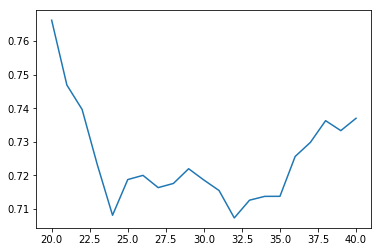

In [32]:
plt.plot(percentages, percentages_results)

Reducing the percentage from 40 to 20, sees the score drop then rise again, but that also depends on each dataset, not on the KNN algorithm.

In [41]:
sqrt_x = np.round(np.sqrt(len(X)))
int(sqrt_x)

28

In [61]:
neighbors = [int(sqrt_x + i) for i in range(-10, 11, 1)]
neighbors_results = []
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=42)
for n in neighbors:
    knn_neighbors = KNeighborsClassifier(n)
    y_pred = knn_neighbors.fit(X_train, y_train).predict(X_test)
    cnf_matrix = confusion_matrix(y_test, y_pred)
    neighbors_results.append({"n": n, "TP": cnf_matrix[1, 1], "TN": cnf_matrix[0, 0]})

/Users/fornesarturo/anaconda3/envs/ds/lib/python3.7/site-packages/ipykernel_launcher.py:6: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  
/Users/fornesarturo/anaconda3/envs/ds/lib/python3.7/site-packages/ipykernel_launcher.py:6: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  
/Users/fornesarturo/anaconda3/envs/ds/lib/python3.7/site-packages/ipykernel_launcher.py:6: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  
/Users/fornesarturo/anaconda3/envs/ds/lib/python3.7/site-packages/ipykernel_launcher.py:6: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  


In [62]:
df = pd.DataFrame(neighbors_results)

In [63]:
df = df.set_index("n")

In [64]:
df

,TN,TP
n,,
18,177,42
19,171,46
20,180,43
21,173,50
22,179,47
23,174,51
24,181,46
25,174,50
26,181,45


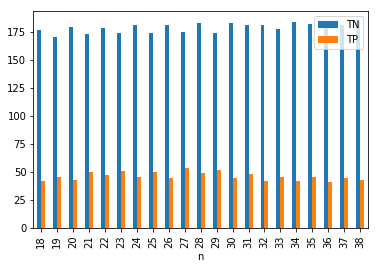

In [65]:
df.plot.bar()

Results are varying but none would point to a particular value for **n** being absolutely better than the others.